# Chapter 2 - Data and Sampling Distributions

In [2]:
%matplotlib inline

from pathlib import Path
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.utils import resample

import seaborn as sns
import matplotlib.pylab as plt

In [3]:
try:
    import common
    DATA = common.dataDirectory()
except ImportError:
    DATA = Path().resolve() / 'data'

In [4]:
LOANS_INCOME_CSV = DATA / 'loans_income.csv'
SP500_DATA_CSV = DATA / 'sp500_data.csv.gz'

## Random Sampling and Sample Bias

**Sample**: A subset from a larger data set.

**Population**: The larger data set or idea of a data set.

**N (n)**: The size of the population (sample).

**Random sampling**: Drawing elements into a sample at random.

**Stratified sampling**: Dividing the population into strata and randomly sampling from each strata.

**Stratum (pl., strata)**: A homogeneous subgroup of a population with common characteristics.

**Simple random sample**: The sample that results from random sampling without stratifying the population.

**Bias**: Systematic error.

**Sample bias**: A sample that misrepresents the population.


- Even in the era of big data, random sampling remains an important arrow in the data scientist’s quiver.
- Bias occurs when measurements or observations are systematically in error because they are not representative of the full population.
- Data quality is often more important than data quantity, and random sampling can reduce bias and facilitate quality improvement that would otherwise be prohibitively expensive.

## Selection Bias

**Selection bias**: Bias resulting from the way in which observations are selected.

**Data snooping**: Extensive hunting through data in search of something interesting.

**Vast search effect**: Bias or nonreproducibility resulting from repeated data modeling, or modeling data with large numbers of predictor variables.

- Specifying a hypothesis and then collecting data following randomization and random sampling principles ensures against bias.
- All other forms of data analysis run the risk of bias resulting from the data collection/analysis process (repeated running of models in data mining, data snooping in research, and after-the-fact selection of interesting events).


## Sampling Distribution of a Statistic

**Sample statistic**: A metric calculated for a sample of data drawn from a larger population.

**Data distribution**: The frequency distribution of individual values in a data set.

**Sampling distribution**: The frequency distribution of a sample statistic over many samples or resamples.

**Central limit theorem**: The tendency of the sampling distribution to take on a normal shape as sample size rises.

**Standard error**: The variability (standard deviation) of a sample statistic over many samples (not to be confused with standard deviation, which by itself, refers to variability of individual data values).


In [5]:
loans_income = pd.read_csv(LOANS_INCOME_CSV).squeeze('columns')

sample_data = pd.DataFrame({'income': loans_income.sample(1000), 'type': 'Data'})
sample_mean_05 = pd.DataFrame({'income': [loans_income.sample(5).mean() for _ in range(1000)], 'type': 'Mean of 5'})
sample_mean_20 = pd.DataFrame({'income': [loans_income.sample(20).mean() for _ in range(1000)], 'type': 'Mean of 20'})

results = pd.concat([sample_data, sample_mean_05, sample_mean_20])
print(results.head())

         income  type
35258   46500.0  Data
28597  160000.0  Data
33493   55000.0  Data
15921   83200.0  Data
19423   70000.0  Data


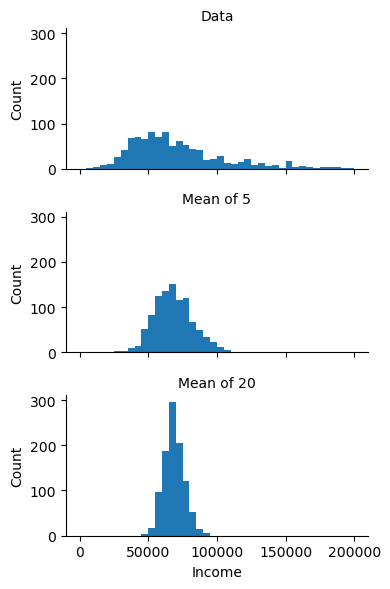

In [6]:
g = sns.FacetGrid(results, col='type', col_wrap=1, height=2, aspect=2)
g.map(plt.hist, 'income', range=[0, 200000], bins=40)
g.set_axis_labels('Income', 'Count')
g.set_titles('{col_name}')

plt.tight_layout()
plt.show()

- The frequency distribution of a sample statistic tells us how that metric would turn out differently from sample to sample.
- This sampling distribution can be estimated via the bootstrap, or via formulas that rely on the central limit theorem.
- A key metric that sums up the variability of a sample statistic is its standard error.

## The Bootstrap

**Bootstrap sample**: A sample taken with replacement from an observed data set.

**Resampling**: The process of taking repeated samples from observed data; includes both bootstrap and permutation (shuffling) procedures.

In [8]:
results = []
for nrepeat in range(1000):
    sample = resample(loans_income)
    results.append(sample.median())
results = pd.Series(results)
print('Bootstrap Statistics:')
print(f'original: {loans_income.median()}')
print(f'bias: {results.mean() - loans_income.median()}')
print(f'std. error: {results.std()}')

Bootstrap Statistics:
original: 62000.0
bias: -83.59550000000309
std. error: 236.33111205313992


- The bootstrap (sampling with replacement from a data set) is a powerful tool for assessing the variability of a sample statistic.
- The bootstrap can be applied in similar fashion in a wide variety of circumstances, without extensive study of mathematical approximations to sampling distributions.
- It also allows us to estimate sampling distributions for statistics where no mathematical approximation has been developed.
- When applied to predictive models, aggregating multiple bootstrap sample predictions (bagging) outperforms the use of a single model.


## Confidence Intervals

**Confidence level**: The percentage of confidence intervals, constructed in the same way from the same population, that are expected to contain the statistic of interest.

**Interval endpoints**: The top and bottom of the confidence interval.


- Confidence intervals are the typical way to present estimates as an interval range.
- The more data you have, the less variable a sample estimate will be.
- The lower the level of confidence you can tolerate, the narrower the confidence interval will be.
- The bootstrap is an effective way to construct confidence intervals.

## Distribuições

### Normal Distribution

**Error**: The difference between a data point and a predicted or average value.

**Standardize**: Subtract the mean and divide by the standard deviation.

**z-score**: The result of standardizing an individual data point.

**Standard normal**: A normal distribution with mean = 0 and standard deviation = 1.

**QQ-Plot**: A plot to visualize how close a sample distribution is to a specified distribution, e.g., the normal distribution.

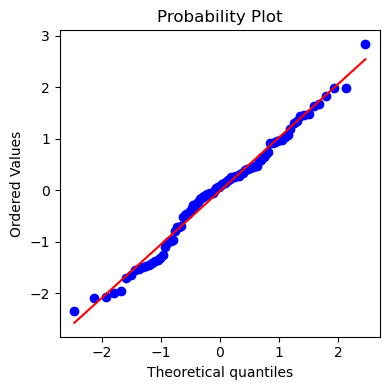

In [9]:
fig, ax = plt.subplots(figsize=(4, 4))

norm_sample = stats.norm.rvs(size=100)
stats.probplot(norm_sample, plot=ax)

plt.tight_layout()
plt.show()

- The normal distribution was essential to the historical development of statistics, as it permitted mathematical approximation of uncertainty and variability.
- While raw data is typically not normally distributed, errors often are, as are averages and totals in large samples.
- To convert data to z-scores, you subtract the mean of the data and divide by the standard deviation; you can then compare the data to a normal distribution.

### Long-Tailed Distributions

**Tail**: The long narrow portion of a frequency distribution, where relatively extreme values occur at low frequency.

**Skew**: Where one tail of a distribution is longer than the other.

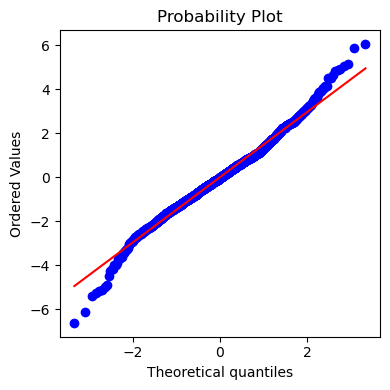

In [10]:
sp500_px = pd.read_csv(SP500_DATA_CSV)

nflx = sp500_px.NFLX
nflx = np.diff(np.log(nflx[nflx>0]))

fig, ax = plt.subplots(figsize=(4, 4))
stats.probplot(nflx, plot=ax)

plt.tight_layout()
plt.show()

- Most data is not normally distributed.
- Assuming a normal distribution can lead to underestimation of extreme events (“black swans”).

### Student’s t-Distribution

**n**: Sample size.

**Degrees of freedom**: A parameter that allows the t-distribution to adjust to different sample sizes, statistics, and numbers of groups.

- The t-distribution is actually a family of distributions resembling the normal distribution but with thicker tails.

- The t-distribution is widely used as a reference basis for the distribution of sample means, differences between two sample means, regression parameters, and more.


### Binomial Distribution

**Trial**: An event with a discrete outcome (e.g., a coin flip).

**Success**: The outcome of interest for a trial. Synonym “1” (as opposed to “0”)

**Binomial**: Having two outcomes. Synonyms yes/no, 0/1, binary

**Binomial trial**: A trial with two outcomes. Synonym Bernoulli trial

**Binomial distribution**: Distribution of number of successes in x trials. Synonym Bernoulli distribution

In [11]:
print(stats.binom.pmf(2, n=5, p=0.1))

0.07289999999999992


In [12]:
print(stats.binom.cdf(2, n=5, p=0.1))

0.99144


- Binomial outcomes are important to model, since they represent, among other things, fundamental decisions (buy or don’t buy, click or don’t click, survive or die, etc.).

- A binomial trial is an experiment with two possible outcomes: one with probability p and the other with probability 1 – p.

- With large n, and provided p is not too close to 0 or 1, the binomial distribution can be approximated by the normal distribution.

### Chi-Square Distribution

- The chi-square distribution is typically concerned with counts of subjects or items falling into categories.
- The chi-square statistic measures the extent of departure from what you would expect in a null model.

### F-Distribution

- The F-distribution is used with experiments and linear models involving measured data.
- The F-statistic compares variation due to factors of interest to overall variation.

### Poisson and Related Distributions

**Lambda**: The rate (per unit of time or space) at which events occur.

**Poisson distribution**: The frequency distribution of the number of events in sampled units of time or space.

**Exponential distribution**: The frequency distribution of the time or distance from one event to the next event.

**Weibull distribution**: A generalized version of the exponential distribution in which the event rate is allowed to shift over time.

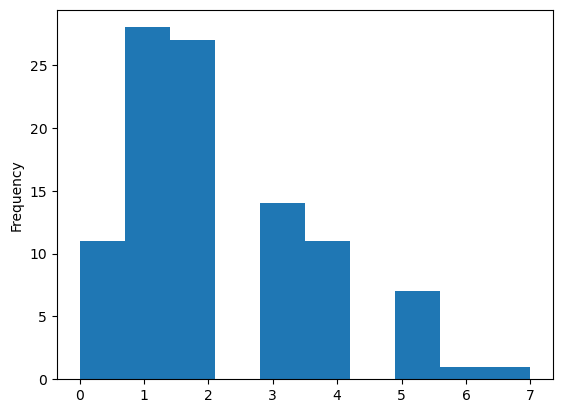

In [13]:
# Poisson
sample = stats.poisson.rvs(2, size=100)

pd.Series(sample).plot.hist()
plt.show()

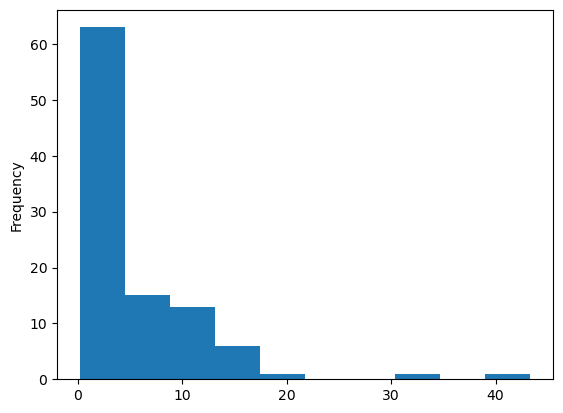

In [14]:
# Exponential
sample = stats.expon.rvs(scale=5, size=100)

pd.Series(sample).plot.hist()
plt.show()

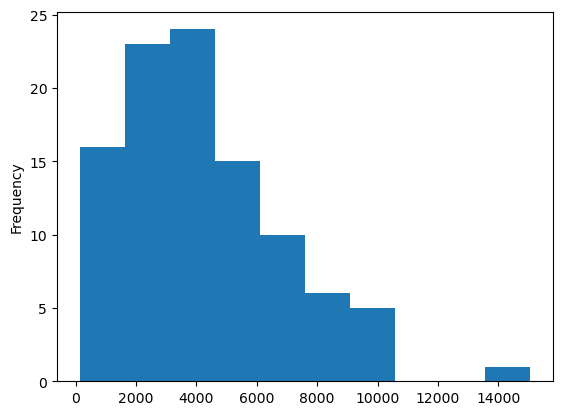

In [15]:
# Weibull
sample = stats.weibull_min.rvs(1.5, scale=5000, size=100)

pd.Series(sample).plot.hist()
plt.show()

- For events that occur at a constant rate, the number of events per unit of time or space can be modeled as a Poisson distribution.
- You can also model the time or distance between one event and the next as an exponential distribution.
- A changing event rate over time (e.g., an increasing probability of device failure) can be modeled with the Weibull distribution.